In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 83.7+ KB


In [29]:
# null column 정리
df['Age'].fillna(df['Age'].mean(), inplace=True, )
df['Cabin'].fillna('N', inplace= True)
df['Embarked'].fillna('N', inplace = True)
df.isnull().sum().sum()

0

In [30]:
print('성별 값 분포: ', df['Sex'].value_counts())
print('성별 값 분포: ', df['Cabin'].value_counts())
print('성별 값 분포: ', df['Embarked'].value_counts())

성별 값 분포:  male      577
female    314
Name: Sex, dtype: int64
성별 값 분포:  N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
성별 값 분포:  S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [31]:
df['Cabin'] = df['Cabin'].str[:1]
df['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [32]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

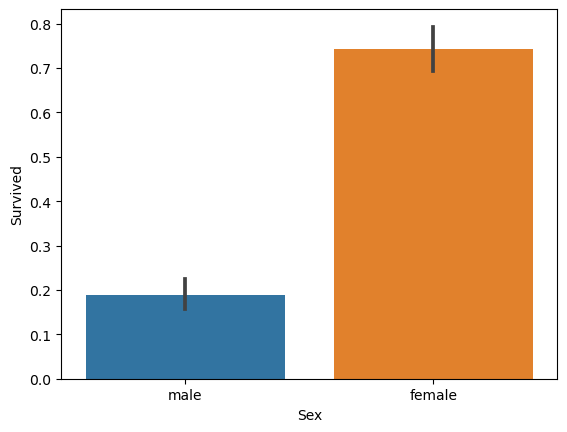

In [34]:
sns.barplot(x= 'Sex', y = 'Survived', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

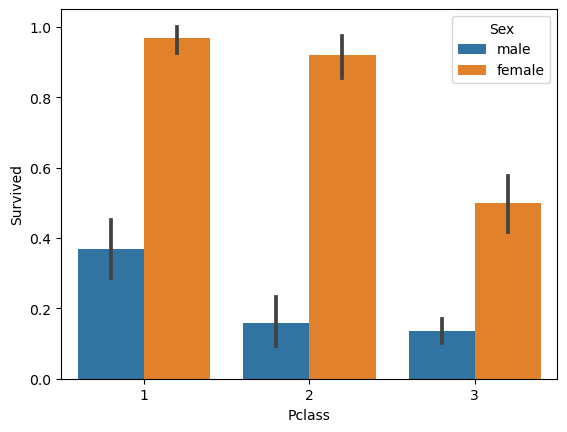

In [20]:
sns.barplot(x = 'Pclass', y= 'Survived', hue = 'Sex', data = df)

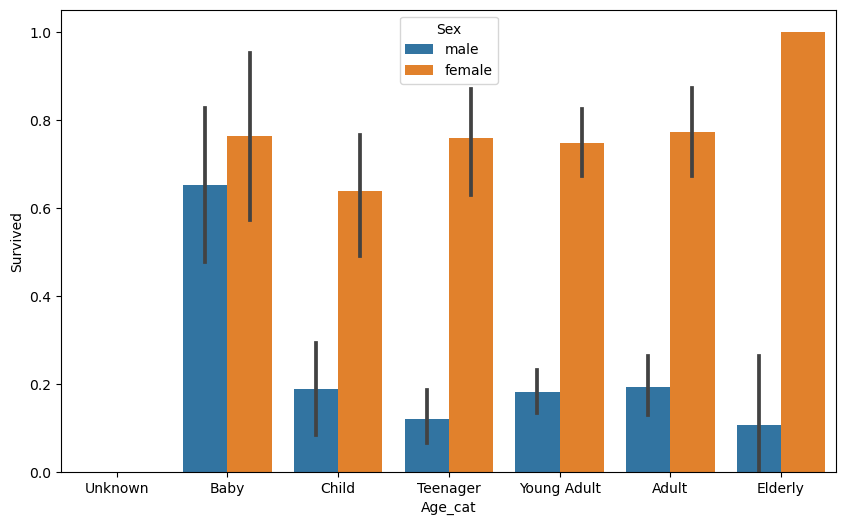

In [39]:
#입력된 age 에 따라 구분값을 반환하는 함수 생성, apply.lambda식에서 사용 예정
def get_category(age):
    cat= ''
    if age <=-1:
        cat = 'Unknown'
    elif age <=5:
        cat = 'Baby'
    elif age <=18:
        cat = 'Child'
    elif age <=25:
        cat = 'Teenager'
    elif age <=35:
        cat = 'Young Adult'
    elif age <=60:
        cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat

#막대그래프 크기 설정
plt.figure(figsize = (10,6))

#x값을 순차적으로 표시
group_names = ['Unknown','Baby','Child','Teenager','Young Adult','Adult','Elderly']

#lambda식에 get_category() 함수를 반환값으로 지정
df['Age_cat'] = df['Age'].apply(lambda x: get_category(x))
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = df, order = group_names)
df.drop('Age_cat', axis = 1, inplace=True)

In [42]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Sex','Age','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

df = encode_features(df)
df
    


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,28,1,0,A/5 21171,7.2500,N,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,52,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",0,34,0,0,STON/O2. 3101282,7.9250,N,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,48,1,0,113803,53.1000,C,3
4,5,0,3,"Allen, Mr. William Henry",1,48,0,0,373450,8.0500,N,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,35,0,0,211536,13.0000,N,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,24,0,0,112053,30.0000,B,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,39,1,2,W./C. 6607,23.4500,N,3
889,890,1,1,"Behr, Mr. Karl Howell",1,34,0,0,111369,30.0000,C,0


In [44]:
from sklearn.preprocessing import LabelEncoder
# null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace= True)
    df['Cabin'].fillna('N', inplace= True)
    df['Embarked'].fillna('N', inplace = True)
    df['Fare'].fillna('0',inplace = True)
    return df
#불필요한 컬럼 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
    return df

#label encoding 진행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#data preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df 
    

In [45]:
#feature and label dataset 추출
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = df['Survived']
X_titanic_df = df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#결정트리, 랜덤 포레스트, 로지스틱 회귀를 위해 사이킷런 classifier class 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rt_clf = RandomForestClassifier(random_state = 11)
lt_clf = LogisticRegression()

#decisionTreeClassier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, dt_pred))

#randomForest 학습/예측/평가
rt_clf.fit(X_train, y_train)
rt_pred = rt_clf.predict(X_test)
print(accuracy_score(y_test, rt_pred))

#Logistic Regression 학습/예측/평가
lt_clf.fit(X_train, y_train)
lt_pred = lt_clf.predict(X_test)
print(accuracy_score(y_test, lt_pred))

0.7821229050279329
0.8547486033519553
0.8603351955307262


/Users/grace/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
#다시
from sklearn.model_selection import KFold

def exec_kfold(clf, folds = 5):
    # 폴드 세트를 5개인 kfold 객체 생성, 폴드 수만큼 예측 결과 저장을 위해 리스트 객체 생성
    kfold = KFold(n_splits= folds)
    scores = []
    #kfold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        #x_titanic_df 데이터에서 교차 검증별 학습과 검증 데이터를 가리키는 Index를 생성함
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        #classifier 학습/예측/정확도 계산
        clf.fit(X_train, y_train)
        clf_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, clf_pred)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1}'.format(iter_count, accuracy))
    #5개의 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균정확도', mean_score)
#exec_kfold 호출
exec_kfold(dt_clf, folds = 5)
print(scores)

교차 검증 0 정확도: 0.7486033519553073
교차 검증 1 정확도: 0.7865168539325843
교차 검증 2 정확도: 0.797752808988764
교차 검증 3 정확도: 0.7696629213483146
교차 검증 4 정확도: 0.8146067415730337
평균정확도 0.7834285355596007


NameError: name 'scores' is not defined

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
print('평균 정확도', format(np.mean(scores)))

교차 검증 0 정확도: 0.7486
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.8090
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8371
평균 정확도 0.7912937040989266


In [65]:
from sklearn.model_selection import GridSearchCV

parameter = {'max_depth': [2,3,5,10],'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf, param_grid = parameter, scoring ='accuracy', cv= 5)
grid_dclf.fit(X_train, y_train)

print('그리드서치 최적 파라미터: ', grid_dclf.best_params_)
print('그리드서치 최고 정확도{0}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_
#gridsearchCV의 최적 하이퍼 파라미터로 학습된 estimator로 예측하고 평가 수행
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('decisionTreeClassifier 정확도 {0:.4f}'.format(accuracy))


그리드서치 최적 파라미터:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
그리드서치 최고 정확도0.7991825076332119
decisionTreeClassifier 정확도 0.8715
